Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

Common settings for cosmological parameters and other CLASS parameters

In [3]:

p18_cosmo = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}



# Radial pressure profiles

In [4]:
M = Class()
pp_settings = {

                  # X ray mass bias (if applicable)
                  'B' : 1.,
                  'output' : 'tSZ_1h,m200c_to_m500c,m500c_to_m200c,m200m_to_m500c,m500c_to_m200m',
                  'pressure profile': 'Custom. GNFW',
}

M.set(p18_cosmo)
M.set(pp_settings)
M.compute()

Text(0, 0.5, '$(P_\\mathrm{gas}/P_{200c})(r/r_{200c})^3$')

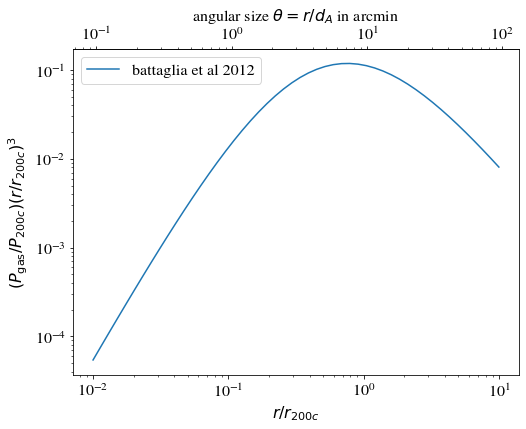

In [9]:
# chose a mass and redshift for a given halo of interest
z = 0.1
m200c = 1e14

# load the profile formula and vectorize:
vec_get_pressure_classy_battaglia = np.vectorize(M.get_pressure_P_over_P_delta_at_x_M_z_b12_200c)

# define array of x=r/r200c:
x_arr = np.geomspace(1e-2,1e1)
x_200c = x_arr

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
r = x_200c*r200c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_arr,vec_get_pressure_classy_battaglia(x_arr,m200c,z)*x_arr**3.,label='battaglia et al 2012')
ax1.loglog()
ax1.legend()
ax1.set_xlabel(r'$\lambda=r/r_{200c}$')
ax1.set_ylabel(r'$P_\mathrm{gas}\lambda^3$')

secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'angular size $\theta = r/d_A$ in arcmin')

ax1.set_xlabel(r'$r/r_{200c}$')
ax1.set_ylabel(r'$(P_\mathrm{gas}/P_{200c})(r/r_{200c})^3$')


Text(0.5, 0, 'angular size $\\theta = r/d_A$ in arcmin')

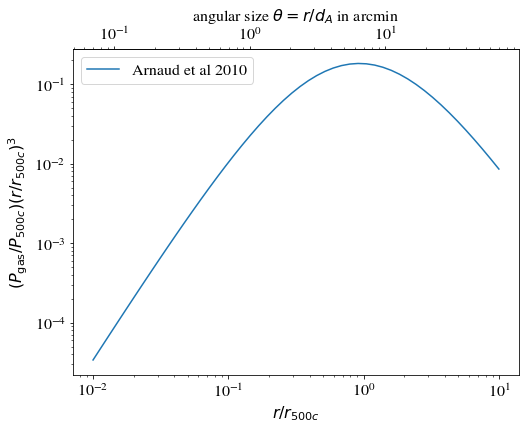

In [7]:
# chose a mass and redshift for a given halo of interest
z = 0.1
m500c = 1e14

# load the profile formula and vectorize:
vec_get_pressure_classy_arnaud = np.vectorize(M.get_pressure_P_over_P_delta_at_x_gnfw_500c)

# define array of x=r/r200c:
x_arr = np.geomspace(1e-2,1e1)
x_500c = x_arr

# dimensonfull radial array:
r500c = M.get_r_delta_of_m_delta_at_z(500,m500c,z)
r = x_500c*r500c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

def x500c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r500c*X/M.get_dA(z))
def theta_arcmin_to_x500c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r500c

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_arr,vec_get_pressure_classy_arnaud(x_arr)*x_arr**3.,label='Arnaud et al 2010')
ax1.loglog()
ax1.legend()
ax1.set_xlabel(r'$r/r_{500c}$')
ax1.set_ylabel(r'$(P_\mathrm{gas}/P_{500c})(r/r_{500c})^3$')

secax = ax1.secondary_xaxis('top', functions=(x500c_to_theta_arcmin, theta_arcmin_to_x500c))

secax.set_xlabel(r'angular size $\theta = r/d_A$ in arcmin')




In [11]:
M.struct_cleanup()
M.empty()